### Instructions

Your notebook must be self contained. Please do not upload anything to canvas other than this notebook.

You are allowed to allowed to copy paste code for functions that were written in lecture/recitation.

You are responsible for cleaning data as and when required. We cannot tell you which datasets are clean and which are not.

Do not spend too much time on a question. Remember that 'perfect is the enemy of good'.

When you are generating a histogram for the purposes of hypothesis testing, we would like you to use a minimum of 1000 iterations (obviously you can do more if you have time towards the end of the exam).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import statsmodels.api as sm

/Users/bhusnur/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
%matplotlib inline

## Q1 (data viz.)

#### Part 1

Using the farmers market dataset, make a bar chart that clearly indicates the number of farmers markets in each of the neighbourhoods. 

*Do not worry about whether the market is present throughout the year. As long as the market is present in the neighbourhood for some time during the year you should count it.*

Which Philadelphia neighbourhood has the most famers markets?

In [ ]:
fm = pd.read_csv('Farmers_Markets.csv')

## Q2

### Part 1

A study conducted on 200 students aged 7 through 14 computed the correlation between
the number of hours that the students studied and the students' weights and found a positive correlation 
(taking all the data into consideration)

The study then tried to claim that studying causes weight gain.

Do you agree with the conclusion of this study? Why or why not?

### Part 2 

You are given two files - **bike.csv** that has the average speed of my commute to or from work and **weather.csv** that has some weather data for Philadelphia.

Using this data, make a linear regression model that predicts the average speed of my bike ride.

Please include a brief explanation for why you chose to include or exclude factors from your model.

## Q3

I was playing a game with my wife and suspected that the die we were using was messed up. So after the game was done, I rolled the die multiple times and here are the results of that experiment

| Number | Times it got rolled |
|--------|---------------------|
| 1      | 12                  |
| 2      | 10                  |
| 3      | 7                   |
| 4      | 17                  |
| 5      | 26                  |
| 6      | 21                  |

**Question** : Use hypothesis testing to tell me whether this die is messed up or not. Please specify your null and alternative hypothesis clearly.

Support your answer with a visualization.

## Q4

This question wants to investigate whether SAT scores differ based on the sex of the test taker.

You are given the dataset **satscores.csv**. It contains the scores for the verbal section and the math section of the SAT for a sample of data.

Compute the difference in means between the math scores for the men and the women.

Next use **bootstrapping** to compute a 95% confidence interval for that difference in means.

Repeat the process for the verbal scores.

Based on your analysis above, are the men and women performing differently in math? 

Are the men and women performing differently in verbal?

## Q5 (cats and ice cream) 

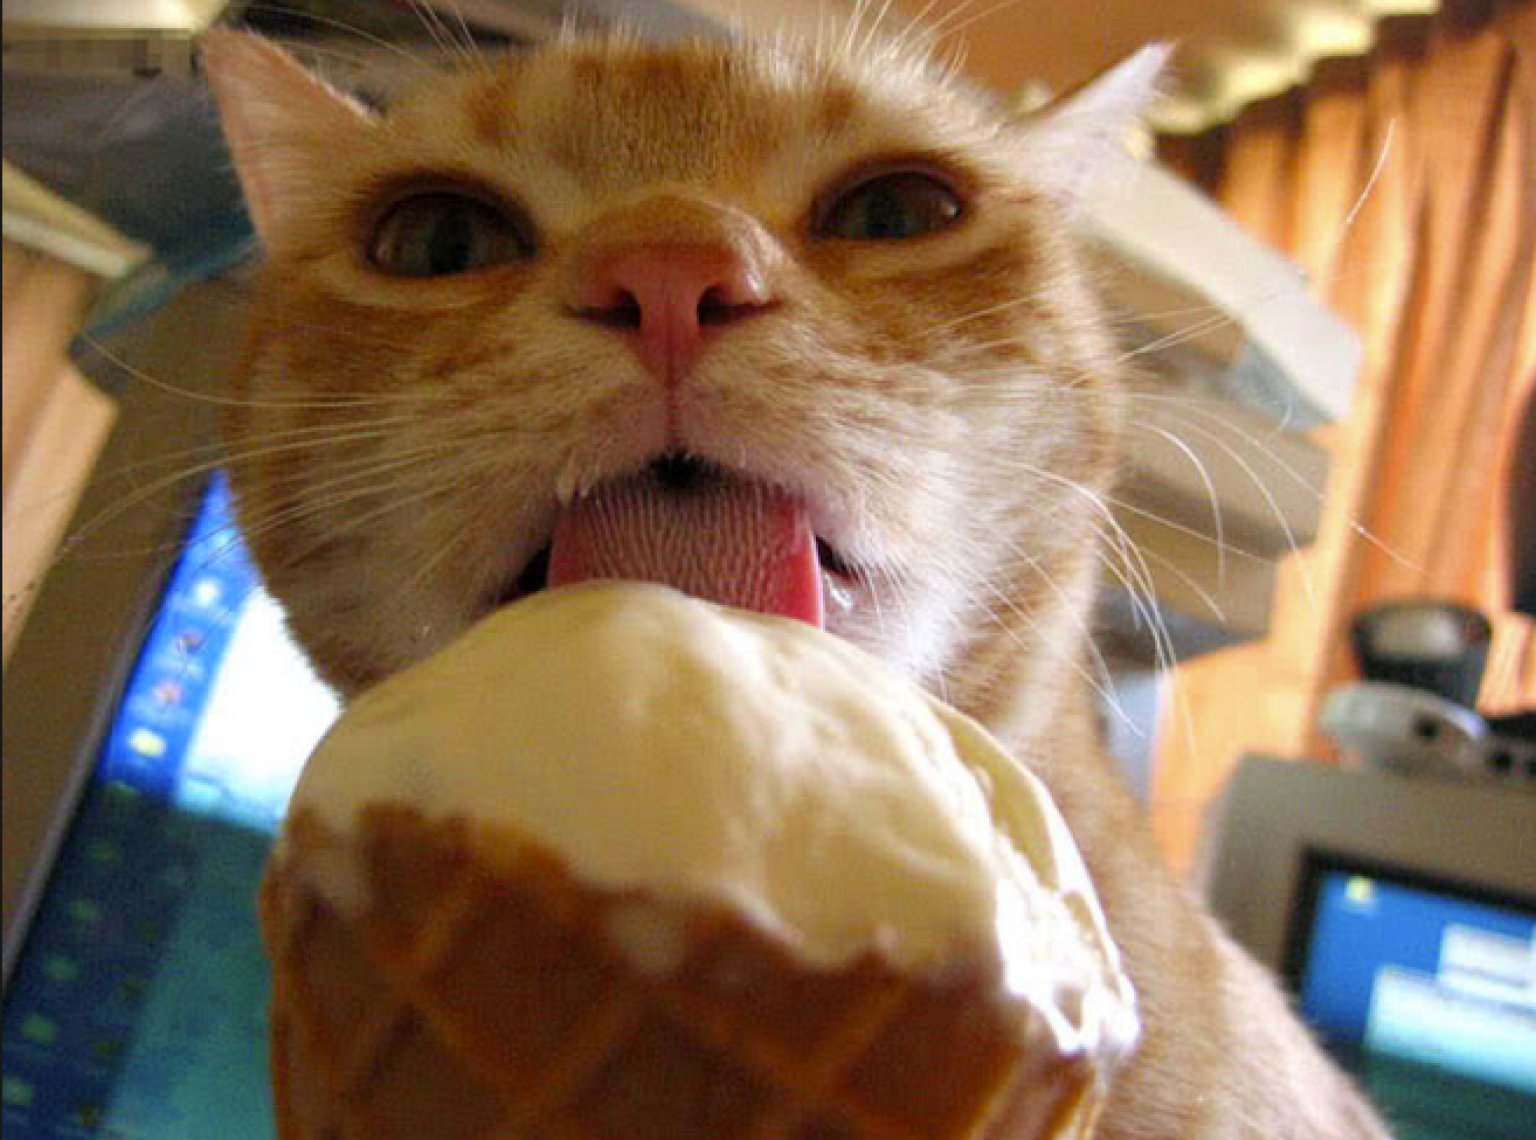

In [1]:
from IPython.display import Image
Image(filename='/Users/bhusnur/Desktop/cic.jpg', width=320, height = 240) 

*please feel free to delete the cell above if that that scares you/disturbs you during the exam*

Using the data in **catdata.csv** evaluate the following hypothesis

For young cats (ages 1 through 5) calico cats have different ice cream preferences than other cats.

Please state your null and alternative hypothesis clearly. Support your answer with a visualization.

In [4]:
cats = pd.read_csv('catdata.csv')

In [5]:
cats.head()

,color,age,favorite-icecream
0,calico,1,strawberry
1,tortoise,1,strawberry
2,calico,1,lemon
3,calico,1,strawberry
4,tabby,1,strawberry


In [6]:
yc = cats[cats['age'] <= 5]

In [7]:
yc.head()

,color,age,favorite-icecream
0,calico,1,strawberry
1,tortoise,1,strawberry
2,calico,1,lemon
3,calico,1,strawberry
4,tabby,1,strawberry


In [8]:
def isCalico(color):
    if color == 'calico':
        return 'calico'
    else:
        return 'non calico'

In [9]:
yc['caliconess'] = yc['color'].apply(isCalico)

/Users/bhusnur/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
yc.head()

,color,age,favorite-icecream,caliconess
0,calico,1,strawberry,calico
1,tortoise,1,strawberry,non calico
2,calico,1,lemon,calico
3,calico,1,strawberry,calico
4,tabby,1,strawberry,non calico


In [11]:
def permutation_test(df, variable, classes, repetitions):
    '''
    variable: column label of the variable whose distribution you are comparing
    classes: column label that has two classes
    repetitions: number of times to do the simulation
    '''
    
    #observed test statistic
    df = df[[variable, classes]]
    df_pivot = df.pivot_table(index=variable, columns = classes, 
                              aggfunc=len, fill_value = 0)
    
    observed = tvd(proportions(df_pivot[df_pivot.columns[0]]),
                   proportions(df_pivot[df_pivot.columns[1]]))
    
    #simulate under the null hypo 
    tvds = []
    df_size = len(df)
    for i in np.arange(repetitions):
        
        #shuffle the dataframe by sampling with replacement
        shuffled_df = df.sample(df_size, replace=False)
        
        #reset the index so that the shuffled order is maintained
        #this is actually key. Try this code without this line and see :)
        shuffled_df = shuffled_df.reset_index()
        
        #create a new temp dataframe with the original classes
        #and the variable values in this shuffled order
        permuted_df = pd.DataFrame({classes : df[classes], variable : shuffled_df[variable]})
        permuted_df_pivot = permuted_df.pivot_table(index=variable, columns = classes, 
                                                    aggfunc=len, fill_value = 0)
        
        #find the tvd
        current_tvd = tvd(proportions(permuted_df_pivot[permuted_df_pivot.columns[0]]), 
                          proportions(permuted_df_pivot[permuted_df_pivot.columns[1]]))
        tvds.append(current_tvd)
        
    tvds = np.array(tvds)
    plt.hist(tvds, ec = 'black')
    plt.scatter(observed, 0, s=30, color='g')
    return(tvds, observed)

In [13]:
def tvd(dist1, dist2):
    '''computes the total variation distance between two distributions'''
    return 0.5 * sum(np.abs(dist1 - dist2))

In [15]:
def proportions(array):
    return array / sum(array)

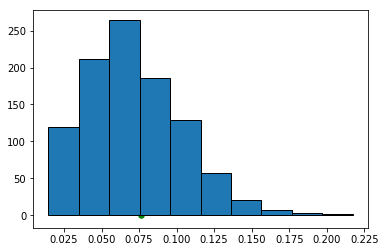

In [18]:
(tvds, obs) = permutation_test(yc, 'favorite-icecream', 'caliconess', 1000)

## Q6 

### part 1
What are the names of your recitation TAs?

### part 2

What is the official name of CIS105? What would you like the course to be called (keep the same name is a totally valid response)?

(any and all answers will get full credit)

--------------------------- THE END -------------------------------

## THANK YOU FOR TAKING THIS CLASS.

We hope learning was as much as fun for you as teaching was for us.